In [1]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
clientbq = bigquery.Client(project='aulafiap-403000')

# Parte 1
### Analise de dados via BQ - dataset publico

DATAMART PARA RESPONDER AS PERGUNTAS

Avalie as corridas dos táxis amarelos de NY e responda:

– Em 2011, como foram as quantidades de corridas de acordo com o dia da semana? (0,5)

– Em 2011, como foram os valores das corridas de acordo com o dia da semana? (0,5)

– Em 2011, como foram os valores das corridas de acordo com a quantidade de passageiros?
(0,25)

– Em 2011, como foram as gorjetas de acordo com o dia da semana? (0,25)

In [4]:
%%time
query_sql = """

SELECT
  YEAR AS YEAR,
  N_DAY AS N_DAY,
  HORAS AS HORAS,
  SUM(QTD_CORRIDAS) as QTD_CORRIDAS,
  SUM(VALOR_CORRIDAS) as VALOR_CORRIDAS,
  SUM(QTD_PASSAGEIROS) as QTD_PASSAGEIROS,
  SUM(VALOR_GORJETA) as VALOR_GORJETA
   FROM(
    SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2011`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2012`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2013`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2014`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2016`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2017`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
          GROUP BY 1,2,3

      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2019`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2020`
          GROUP BY 1,2,3
      UNION ALL

      SELECT
      data_file_year as YEAR,
      EXTRACT(DAYOFWEEK FROM pickup_datetime) AS N_DAY,
      EXTRACT(HOUR FROM pickup_datetime) as HORAS,
      COUNT(trip_distance) as QTD_CORRIDAS,
      SUM(total_amount) as VALOR_CORRIDAS,
      SUM(passenger_count) as QTD_PASSAGEIROS,
      SUM(tip_amount) as VALOR_GORJETA
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021`
          GROUP BY 1,2,3
    )
    GROUP BY 1,2,3
    ORDER BY YEAR,N_DAY,HORAS ASC
"""
query_job = clientbq.query(query_sql)
dados = query_job.to_dataframe()
display(dados)

,YEAR,N_DAY,HORAS,QTD_CORRIDAS,VALOR_CORRIDAS,QTD_PASSAGEIROS,VALOR_GORJETA
0,2011,1,0,1502049,18173804.560000000,2762139,1342390.640000000
1,2011,1,1,1350037,16417813.880000000,2441262,1259725.010000000
2,2011,1,2,1121865,13899072.810000000,2012288,1084357.080000000
3,2011,1,3,917031,11693619.880000000,1637262,897288.330000000
4,2011,1,4,593421,7972200.610000000,1043908,546350.930000000
...,...,...,...,...,...,...,...
1843,2021,7,19,282406,5242169.430000000,412688,644021.500000000
1844,2021,7,20,239871,4591970.170000000,353882,562593.610000000
1845,2021,7,21,221570,4273529.320000000,330610,528497.080000000
1846,2021,7,22,221699,4330558.910000000,327511,544590.760000000


CPU times: user 170 ms, sys: 10.8 ms, total: 181 ms
Wall time: 2.33 s


Pergunta A – Em 2011, como foram as quantidades de corridas de acordo com o dia da semana? (0,5)


In [5]:
dados_2011=dados[dados.YEAR==2011].copy()

In [6]:
dados_2011= dados_2011.groupby('N_DAY').agg({
    'VALOR_CORRIDAS': 'sum',
    'QTD_CORRIDAS': 'sum',
    'VALOR_GORJETA': 'sum',
    'QTD_PASSAGEIROS': 'sum'
}).reset_index()

In [7]:
dados_2011

,N_DAY,VALOR_CORRIDAS,QTD_CORRIDAS,VALOR_GORJETA,QTD_PASSAGEIROS
0,1,273040963.850000000,22129054,20179054.260000000,38162459
1,2,281640186.730000000,22921512,22265593.090000000,36882783
2,3,306148454.560000000,25193101,24917955.090000000,40376184
3,4,317448471.550000000,25913572,26206730.070000000,41587910
4,5,332391419.360000000,26659106,27279860.170000000,43139900
5,6,338269723.220000000,27265076,26461105.930000000,45057548
6,7,313570399.530000000,26805827,22442171.100000000,46967307


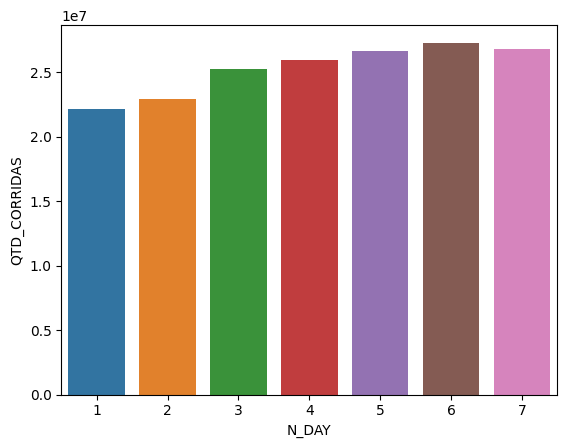

In [8]:
sns.barplot(x = 'N_DAY',
            y = 'QTD_CORRIDAS',
            data = dados_2011)
plt.show()

Pergunta B – Em 2011, como foram os valores das corridas de acordo com o dia da semana? (0,5)


In [9]:
dados_2011[['N_DAY','VALOR_CORRIDAS']]

,N_DAY,VALOR_CORRIDAS
0,1,273040963.850000000
1,2,281640186.730000000
2,3,306148454.560000000
3,4,317448471.550000000
4,5,332391419.360000000
5,6,338269723.220000000
6,7,313570399.530000000


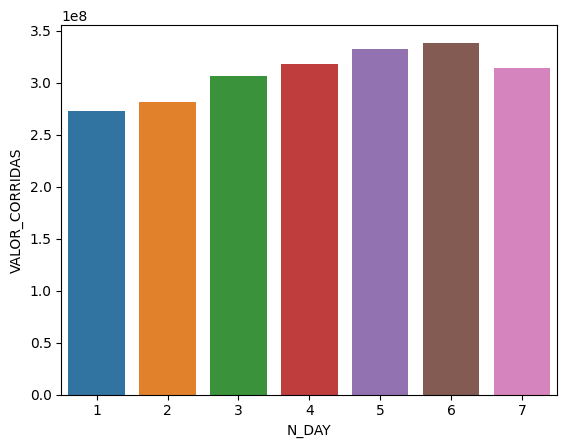

In [10]:
sns.barplot(x = 'N_DAY',
            y = 'VALOR_CORRIDAS',
            data = dados_2011)
plt.show()

Pergunta C – Em 2011, como foram os valores das corridas de acordo com a quantidade de passageiros?
(0,25)

In [11]:
dados_2011[['N_DAY','QTD_PASSAGEIROS','VALOR_CORRIDAS']]

,N_DAY,QTD_PASSAGEIROS,VALOR_CORRIDAS
0,1,38162459,273040963.850000000
1,2,36882783,281640186.730000000
2,3,40376184,306148454.560000000
3,4,41587910,317448471.550000000
4,5,43139900,332391419.360000000
5,6,45057548,338269723.220000000
6,7,46967307,313570399.530000000


<Axes: xlabel='N_DAY', ylabel='QTD_PASSAGEIROS'>

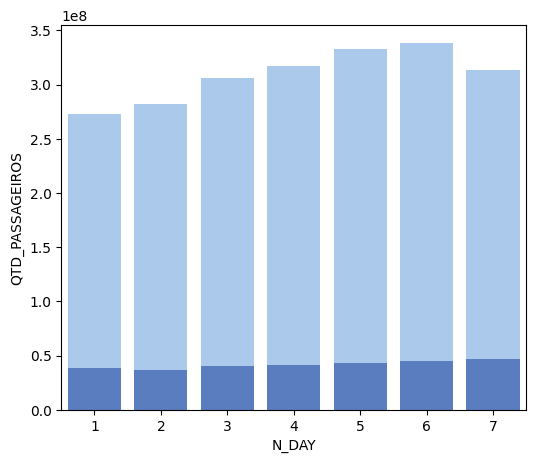

In [12]:
f, ax = plt.subplots(figsize=(6, 5))

sns.set_color_codes("pastel")
sns.barplot(x="N_DAY", y="VALOR_CORRIDAS", data=dados_2011, color="b")

sns.set_color_codes("muted")
sns.barplot(x="N_DAY", y="QTD_PASSAGEIROS", data=dados_2011, color="b")


Pergunta D – Em 2011, como foram as gorjetas de acordo com o dia da semana? (0,25)

In [13]:
dados_2011[['N_DAY','VALOR_GORJETA']]

,N_DAY,VALOR_GORJETA
0,1,20179054.260000000
1,2,22265593.090000000
2,3,24917955.090000000
3,4,26206730.070000000
4,5,27279860.170000000
5,6,26461105.930000000
6,7,22442171.100000000


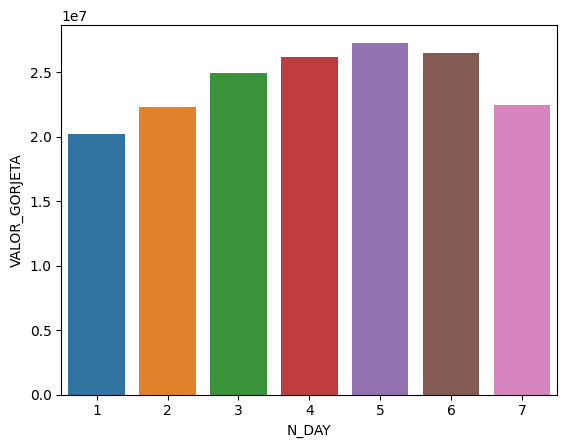

In [14]:
sns.barplot(x = 'N_DAY',
            y = 'VALOR_GORJETA',
            data = dados_2011)
plt.show()

Ainda neste conjunto de dados, avalie a evolução ano a ano até 2021

– Total absoluto de corridas (0,5)

– Total relativo de corridas por dia da semana (0,5)

– Total relativo de corridas por período do dia (1,5)

Pergunta 1– Total absoluto de corridas (0,5)

In [15]:
print ('Total absoluto de corridas: ',dados['QTD_CORRIDAS'].sum())

Total absoluto de corridas:  1631577668


Pergunta 2 -Total relativo de corridas por dia da semana (0,5)

In [16]:
dados_semana= dados.groupby(['N_DAY']).agg({
    'VALOR_CORRIDAS': 'sum',
    'QTD_CORRIDAS': 'sum',
    'VALOR_GORJETA': 'sum',
    'QTD_PASSAGEIROS': 'sum'
}).reset_index()

In [17]:
dados_semana

,N_DAY,VALOR_CORRIDAS,QTD_CORRIDAS,VALOR_GORJETA,QTD_PASSAGEIROS
0,1,3252214232.020000000,212759437,317593320.540000000,362815366
1,2,3251240919.460000000,211449432,330345762.780000000,341923329
2,3,3503858942.960000000,230454093,363825613.050000000,371475431
3,4,3667265714.600000000,238241830,384238469.910000000,384201845
4,5,3828053020.620000000,244009140,399322083.510000000,395025730
5,6,3860829867.990000000,249257486,388835019.420000000,409849936
6,7,3526461162.470000000,245406250,333528368.560000000,422860871


Pergutan 3 – Total relativo de corridas por período do dia (1,5)

In [18]:
dados_horas= dados.groupby('HORAS').agg({
    'VALOR_CORRIDAS': 'sum',
    'QTD_CORRIDAS': 'sum',
    'VALOR_GORJETA': 'sum',
    'QTD_PASSAGEIROS': 'sum'
}).reset_index()

In [19]:
dados_horas[['HORAS','QTD_CORRIDAS']]

,HORAS,QTD_CORRIDAS
0,0,59974484
1,1,43758366
2,2,32096907
3,3,23348584
4,4,17395113
5,5,16247101
6,6,35072040
7,7,59729195
8,8,73735692
9,9,75876488


# Parte 2

#### Criação do Modelo e Deploy

In [20]:
query_sql = """
SELECT
      *
        FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
        LIMIT 10000
        """
query_job = clientbq.query(query_sql)
dados_dataset = query_job.to_dataframe()

In [21]:
tip_y = dados_dataset['tip_amount']>0
tip_n = (dados_dataset['tip_amount']<0) | (dados_dataset['tip_amount']==0)

In [22]:
dados_dataset.loc[tip_y,'FLG_TIP']='Y'
dados_dataset.loc[tip_n,'FLG_TIP']='N'

In [23]:
dados_dataset=dados_dataset[['FLG_TIP','data_file_year','dropoff_location_id','pickup_location_id','total_amount','tolls_amount','mta_tax','payment_type']]

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dados_dataset.drop('FLG_TIP',axis=1)
Y = dados_dataset['FLG_TIP']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ar = DecisionTreeClassifier()
ar.fit(X_train, Y_train)

predict = ar.predict(X_test)

precisão = accuracy_score(Y_test, predict)
print(f'A precisão do modelo de  Arvore é: {precisão}')

A precisão do modelo de  Arvore é: 0.9925


In [25]:
import joblib

joblib.dump(ar, 'model.pkl')

['model.pkl']

#Parte 3

###Uso do vertex GCP com o dataset disponibilizado

In [26]:
!pip install google-cloud-aiplatform

In [27]:
import vertexai
from vertexai.language_models import TextGenerationModel
import json

In [28]:
location = "us-central1"  #@param {type: "string"}
#@markdown ---
vertexai.init(project='aulafiap-403000', location=location)

In [29]:
##Dados de corrida, cujo criamos um DM na parte 1 dos exercicios

display(dados)

,YEAR,N_DAY,HORAS,QTD_CORRIDAS,VALOR_CORRIDAS,QTD_PASSAGEIROS,VALOR_GORJETA
0,2011,1,0,1502049,18173804.560000000,2762139,1342390.640000000
1,2011,1,1,1350037,16417813.880000000,2441262,1259725.010000000
2,2011,1,2,1121865,13899072.810000000,2012288,1084357.080000000
3,2011,1,3,917031,11693619.880000000,1637262,897288.330000000
4,2011,1,4,593421,7972200.610000000,1043908,546350.930000000
...,...,...,...,...,...,...,...
1843,2021,7,19,282406,5242169.430000000,412688,644021.500000000
1844,2021,7,20,239871,4591970.170000000,353882,562593.610000000
1845,2021,7,21,221570,4273529.320000000,330610,528497.080000000
1846,2021,7,22,221699,4330558.910000000,327511,544590.760000000


In [30]:
dados_vertex=dados.sample(100) #controlar limite de quota/volume indo para o GCP, entao definimos apenas 100 linhas aleatorias

In [31]:
parameters = {
    "candidate_count": 1,
    "max_output_tokens": 1024,
    "temperature": 0.2,
    "top_p": 0.8,
    "top_k": 40
}

model = TextGenerationModel.from_pretrained("text-bison")

In [32]:
#No caso forem realizadas feitas 2 "Perguntas de Negocio" ao Vertex que tivemos suas respostas
#em "Flags" com "SIM" ou "NAO", para incorporarmos ao dataset atual e enriquecer o dashboard criado a partir deste DataMart consumido

In [33]:
import time

dados_vertex['FLG_HORARIO_PICO'] = None

for index, row in dados_vertex.iterrows():
    myprompt = f"""Você consideraria o horário {row['HORAS']} como horário de pico com base na quantidade de corridas?:
    Exemplo de retorno:
    ['SIM', 'NAO']

    Retorne a resposta como uma string
    """
    response = model.predict(
        myprompt,
        **parameters
    )
    valor = response.text

    dados_vertex.at[index, 'FLG_HORARIO_PICO'] = valor


    time.sleep(1)


In [34]:
dados_vertex['FLG_GORJETA'] = None

for index, row in dados_vertex.iterrows():
    myprompt = f"""Você observou um aumento no VALOR_GORJETA com o aumento de passageiros na corrida?:
    N_DAY: {row['N_DAY']}
    QTD_PASSAGEIROS: {row['QTD_PASSAGEIROS']}
    Exemplo de retorno:
    ['SIM', 'NAO']

    Retorne a resposta como uma string
    """

    response = model.predict(
        myprompt,
        **parameters
    )

    valor = response.text

    dados_vertex.at[index, 'FLG_GORJETA'] = valor

    time.sleep(1)


In [35]:
dados_vertex.head()

,YEAR,N_DAY,HORAS,QTD_CORRIDAS,VALOR_CORRIDAS,QTD_PASSAGEIROS,VALOR_GORJETA,FLG_HORARIO_PICO,FLG_GORJETA
217,2012,3,1,506554,7012415.970000000,826303,573985.360000000,NAO,SIM
716,2015,2,20,1131777,17451877.540000000,1881831,2002067.680000000,SIM,SIM
1143,2017,6,15,858368,14791708.570000000,1388928,1615649.010000000,NAO,SIM
1115,2017,5,11,793160,13143570.950000000,1267689,1475140.340000000,NAO,SIM
1232,2018,3,8,1642830,25096033.380000000,2527050,3082992.900000000,NAO,SIM


In [36]:
dados_vertex['FLG_HORARIO_PICO'].unique()

array([' NAO', ' SIM'], dtype=object)

In [37]:
dados_vertex['FLG_GORJETA'].unique()

array([' SIM'], dtype=object)